# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [5]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [21]:
# 1. Is the distribution of body temperatures normal? 
# I'll begin with some EDA to get a feel for the data.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("darkgrid")
sns.set_context("poster")
%matplotlib inline
print(df.head())
print(df.describe())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


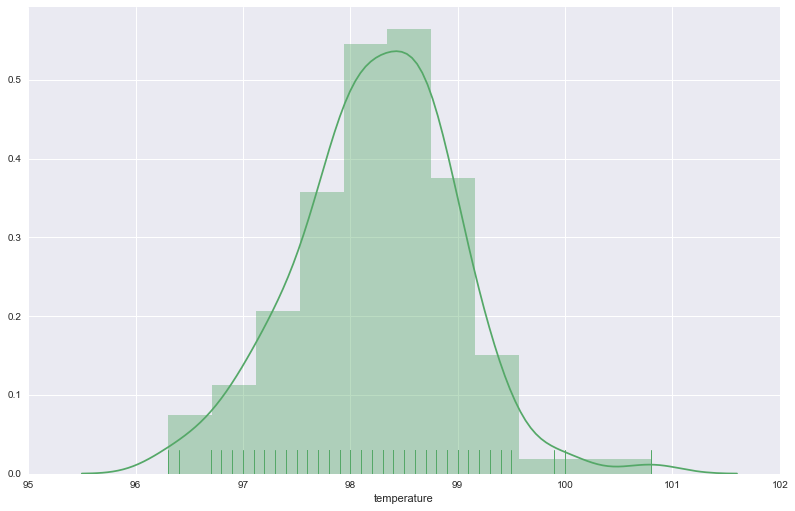

In [91]:
#So we have 3 columns (features), and our mean appears to be close to Wunderlich's 98.6. 
#displot() gives a histogram with a gaussian KDE curve so proves useful for single-variate comparison to Normal
plt.xlim(95,102)
plt.style.use('seaborn-deep')
g=sns.distplot(df['temperature'], rug=True, bins=11, color="g")
plt.show()


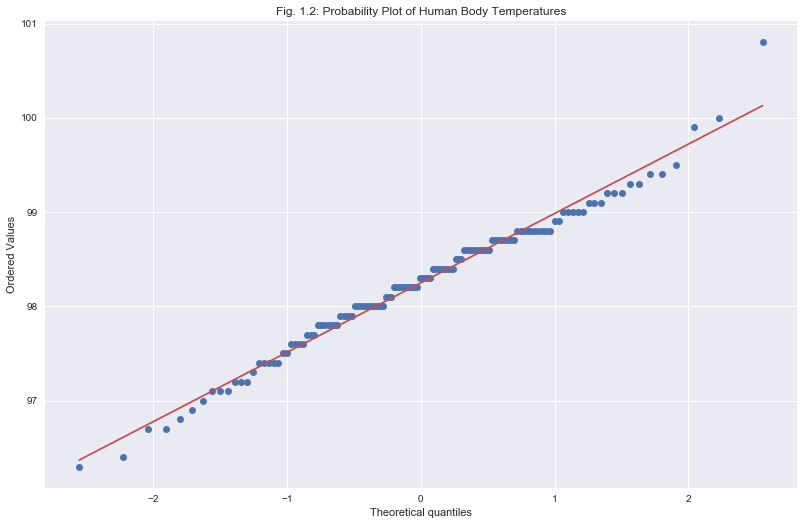

In [92]:
import pylab
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('seaborn-deep')
stats.probplot(temp, dist='norm', plot=pylab)
plt.title('Fig. 1.2: Probability Plot of Human Body Temperatures');

In [76]:
nt = stats.mstats.normaltest(df['temperature']) 
print('The z-statstic of the normality test is {:1.3f} with a p-value of {:1.3f}. The distribution is not normal.'.format(nt[0],nt[1]))

The z-statstic of the normality test is 2.704 with a p-value of 0.259. The distribution is not normal.


### Answer 2
Yes, the sample size is large (over 30) and the observations are independent.

### Answer
The histogram roughly appears normal with much tweaking of the parameters. 
Visually, I'd estimate this isn't normal, but we need something more rigorous.

In [66]:
#Is the true population mean really 98.6 degrees F? First, try a bootstrap hypothesis test. 
#Using scikit-learn's resample tool:
# bootstrap hypothesis test with 500 samples
bs_replicates = np.empty(500)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(temp, len(temp))
    bs_replicates[i] = np.mean(bs_sample)
    
p = np.sum(bs_replicates >= 98.6) / size

print('p-value: {}'.format(p))
print('mean: {:0.5}'.format(np.mean(bs_replicates)))

p-value: 0
mean: 98.247


In [68]:
#3 cont'd: Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
import scipy.stats
wundermu= 98.6

onesample_results = scipy.stats.ttest_1samp(boot, wundermu)
print onesample_results

Ttest_1sampResult(statistic=-8.8784707739013005, pvalue=1.2228971548896121e-17)


### Answer:
I'm using a one-sample t-test because we have one sample population compared to a hypothesized mean: 98.6. A Z-statistic would require a population standard deviation, which we don't have.


In [79]:
#Now try the other frequentist test.
n = len(df.temperature)
se = temp_std/np.sqrt(n)
z_stat = (temp_mean - 98.6)/se
p_val = stats.norm.sf(np.abs(z_stat))*2
print("The z-statistic is {:1.3f} and the p-value is {:1.8f}. We may reject the null hypothesis that the true population mean is 98.6.".format(z_stat, p_val))

The z-statistic is -5.455 and the p-value is 0.00000005. We may reject the null hypothesis that the true population mean is 98.6.


    4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the tt and zz statistic? 

In [82]:
sample_temp = np.random.choice(a = temp, size=10)
r = stats.ttest_1samp(sample_temp, 98.6)
print('t-score: {:0.4}\np-value: {:0.4}'.format(r.statistic, r.pvalue))

t-score: -1.856
p-value: 0.09642


 At what temperature should we consider someone's temperature to be "abnormal"?

    As in the previous example, try calculating everything using the bootstrap approach, as well as the frequentist approach.
    Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [93]:
# get the sample mean and standard deviation for use with bootstrap and frequentist approaches below
x_bar = np.mean(temp)
s = np.std(temp)
print('sample mean: {:0.4}\nsample standard deviation: {:0.4}\n'.format(x_bar, s))

sample mean: 98.25
sample standard deviation: 0.7304



In [94]:
# Calculates p value using 100,000 boostrap replicates
bootstrap_replicates = np.empty(100000)

size = len(bootstrap_replicates)

for i in range(size):
    bootstrap_sample = np.random.choice(temp, size=len(temp))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)

p = np.sum(bootstrap_replicates >= 98.6) / len(bootstrap_replicates)
print('p-value: {}'.format(p))

x_bar = np.mean(bootstrap_replicates)
ci = stats.norm.interval(0.95, loc=x_bar, scale=s)

print('95% confidence interval: {:0.5} - {:0.5}'.format(ci[0], ci[1]))
print('margin of error: +/-{:0.5}\n\n'.format((ci[1] - x_bar)))

p-value: 0
95% confidence interval: 96.818 - 99.681
margin of error: +/-1.4315




In [96]:
# frequentist approach - confidence interval for the one-sample t-test

# alpha = 0.05

# confidence interval for one draw
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=x_bar, scale=s)
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci_low_f, ci_high_f))

# margin of error 
print('margin of error: +/-{:0.5}'.format((ci_high_f - x_bar))) 

95% confidence interval: 96.818 - 99.681
margin of error: +/-1.4315


In [97]:
# Compute a t-statistic to test the difference in means between males and females

males = df['temperature'][df.gender=='M']
females = df['temperature'][df.gender=='F']
n_m = len(males)
n_f = len(females)
diff = males.mean() - females.mean()
std = np.sqrt(males.var()/n_m + females.var()/n_f)

t_stat_d = (diff - 0)/std
p_value_d = stats.t.sf(np.abs(t_stat_d), n_m+n_f-2)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat_d, p_value_d))

The t-statistic is -2.285 and the p-value is 0.0239319


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001018C4E0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010C25C88>], dtype=object)

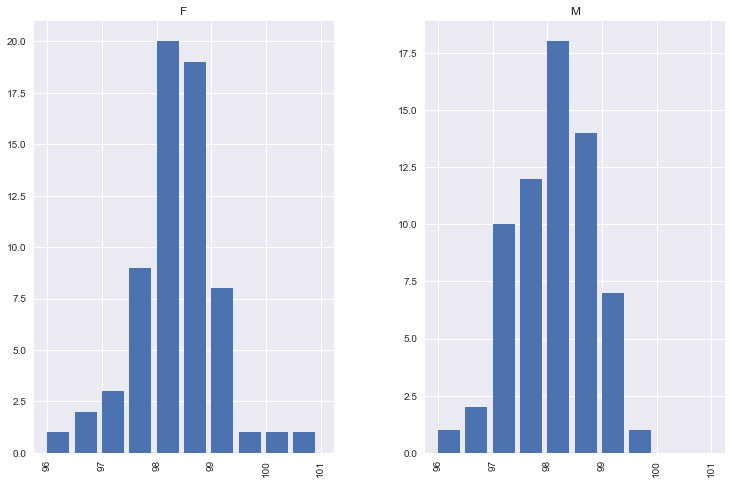

In [100]:


# Show histograms for males and females separately
df['temperature'].hist(by=df['gender'], width=0.4, range=[96, 101])



The normal body temperature has been generally accepted as 98.6$^{\circ}$F for a long time, but the dataset here shows that the mean body temperature from a sample of 130 subjects is about 98.2$^{\circ}$F. Using the sample to test whether the true body temperature is 98.6$^{\circ}$F or not, we obtain a t-statistic of -5.455 with a p-value less than 0.001, rendering evidence to reject the widely accepted view. Moreover, the 99% confidence interval of the mean temperature ranges from 98.08 to 98.42 and is still strictly below the claim of 98.6.

The mean temperatures for men and women are 98.1 and 98.4, which are both within the 99% confidence interval. A natural question is to ask if the difference between gender is statistically significant. A two-sample t test yields a t-statistic of -2.285 with a p-value of 0.024, providing no strong evidence for or against the claim of no difference. However, women having higher core temperatures on average might help explain why women often feel colder than men. Since women are used to high body temperatures, cold air will feel even colder to the body. But more research is needed to answer the question on the gender difference in body temperatures and explain why.